In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cftime
import calendar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mticker
from matplotlib.colors import TwoSlopeNorm
import imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

In [6]:
aod = xr.open_dataset('/nird/datalake/NS1004K/elihho/eVolv2k_v3_EVA_AOD_-500_1900_1_ym.nc')
# Extract latitude
lat = aod['lat']

# Calculate weights: cos(lat) in radians
weights = np.cos(np.deg2rad(lat))

scand_lat = slice(79, 50)

scand_aod = aod['aod550'].sel(lat=scand_lat).weighted(weights).mean(dim='lat')

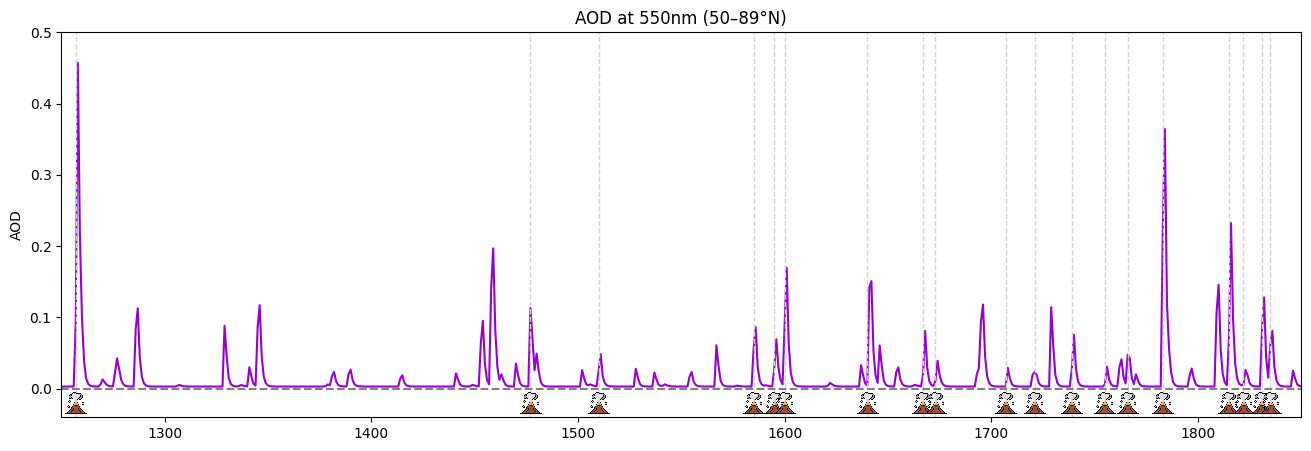

In [41]:
scand_aod_1250_1850 = scand_aod.sel(time = slice(1250., 1850.))

volcano = [1257, 1477, 1510, 1585, 1595, 1600, 1640, 1667, 1673, 1707, 1721, 1739, 1755, 1766, 1783, 1815, 1822, 1831, 1835]

volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

fig, ax = plt.subplots(figsize=(16,5))

x = scand_aod_1250_1850['time'].values
y = scand_aod_1250_1850.values
ax.plot(x, y, color='darkviolet', label='echam6 all forcing')

for vt in volcano:
    ax.axvline(vt, color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (vt, -0.02), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

ax.axhline(0, linestyle='--', color='gray')
ax.set_ylim(-0.04, 0.5)
ax.set_xlim(1250, 1850)
ax.set_ylabel('AOD')
ax.set_title('AOD at 550nm (50–89°N)')
plt.show()

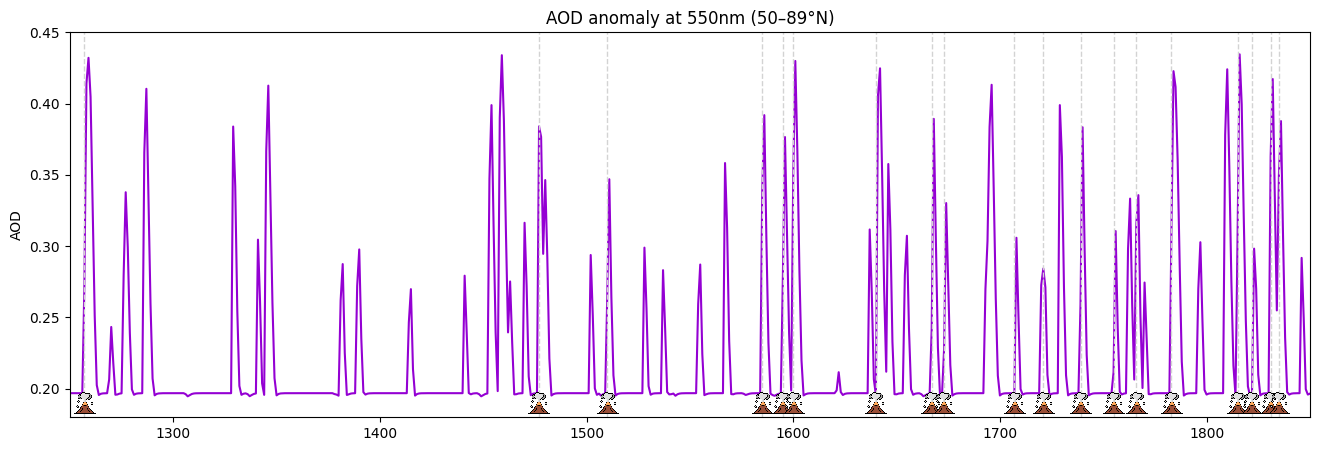

In [42]:
scand_ref = aod['reff'].sel(lat=scand_lat).weighted(weights).mean(dim='lat')
scand_ref_1250_1850 = scand_ref.sel(time = slice(1250., 1850.))
aod_anom = scand_ref_1250_1850 - scand_aod_1250_1850

volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

fig, ax = plt.subplots(figsize=(16,5))

x = aod_anom['time'].values
y = aod_anom.values
ax.plot(x, y, color='darkviolet', label='echam6 all forcing')

for vt in volcano:
    ax.axvline(vt, color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (vt, 0.19), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

ax.set_ylim(0.18, 0.45)
ax.set_xlim(1250, 1850)
ax.set_ylabel('AOD')
ax.set_title('AOD anomaly at 550nm (50–89°N)')
plt.show()

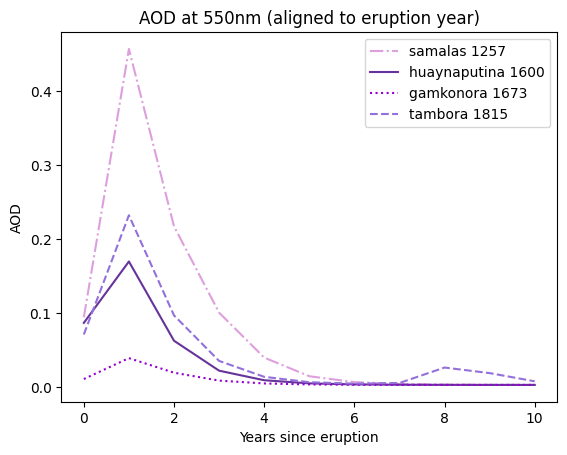

In [43]:
aod_samalas = scand_aod.sel(time=slice(1257., 1267))

aod_huaynaputina = scand_aod.sel(time=slice(1600., 1610))

aod_gamkonora = scand_aod.sel(time=slice(1673, 1683))

aod_tambora = scand_aod.sel(time=slice(1815., 1825))

t_samalas   = aod_samalas['time']   - aod_samalas['time'].values[0]
t_huaynaputina  = aod_huaynaputina['time']  - aod_huaynaputina['time'].values[0]
t_gamkonora = aod_gamkonora['time'] - aod_gamkonora['time'].values[0]
t_tambora  = aod_tambora['time']  - aod_tambora['time'].values[0]

plt.plot(t_samalas,  aod_samalas, color = 'plum', linestyle="-.", label="samalas 1257")
plt.plot(t_huaynaputina, aod_huaynaputina, color = 'rebeccapurple', linestyle="-",  label="huaynaputina 1600")
plt.plot(t_gamkonora, aod_gamkonora, color = 'darkviolet', linestyle=':', label='gamkonora 1673')
plt.plot(t_tambora, aod_tambora, color = 'mediumpurple', linestyle="--", label="tambora 1815")

plt.title("AOD at 550nm (aligned to eruption year)")
plt.ylabel("AOD")
plt.xlabel("Years since eruption")
plt.legend()
plt.show()